<a href="https://colab.research.google.com/github/xhdixhfl/DeepLearning-Project/blob/main/r_cnn_%EB%AA%A8%EB%8D%B8_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

In [ ]:
if torch.cuda.is_available():
  DEVICE = torch.device("cuda")
  print(DEVICE, torch.cuda.get_device_name(0))
else:
  DEVICE = torch.device("cpu")
  print(DEVICE)


cpu


In [ ]:
# # 제이슨 파일 읽기
# import json

# file_path = "./content/drive/MyDrive/image/prac_car.json"

# with open(file_path, 'r') as file:
#   data = json.load(file)
#   print(type(data))
#   print(data)
#   print(data[''])

In [ ]:
# # json 파일 프린트
# from glob import glob
# for filename in glob('*.json'):
#   print(filename)

In [ ]:
# # 각 파일의 shape, head 출력
# from IPython.display import display

# def preview():
#   for filename in glob('*.json'):
#     df = pd.read_json(filename)
#     print(filename, df.shape)
#     display(df.head())
#     print('\n')
    
# preview()

(480, 720, 3)


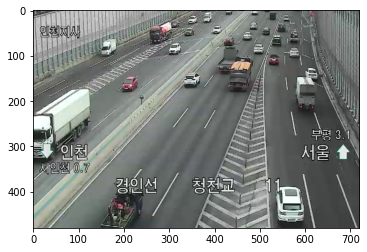

In [ ]:
img0 = cv2.imread("/content/drive/MyDrive/image/frame0.png")
img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
print(img0.shape)
plt.imshow(img0)
plt.show()

In [ ]:
# object information : a set of bounding boxes [x1, y1, x2, y2]  
## [y min, xmin, y max, x max]
# and their labels
bbox0 = np.array([[1,170,129,172], [142,376,109,103],  [532,382,70,85], [573,150,50,70],[602,121,28,30],[561,82,24,25],
                  [563,41,25,31], [550,5,17,22], [535,28,26,23], [521,52,31,29], [515, 89, 31, 35], [479,71,33,30],
                  [459,47,25,22], [474,22, 24, 21], [503, 34, 21,25], [518,3,20,20],[422,2,16,11], [390,32,30,21],
                  [418,58,28,23], [402,81,50,58], [428,102,55,74],[330,136,43,38], [190,144,49,39],[150,59,37,48],
                  [258,25,48,51],[302,20,24,23],[333,35,25,24],[297,69,32,30],[339,8,25,23],[374,2,24,31]]) 
labels = np.array([1, 1, 1, 1,1,1,1,1,1,1,1,1,
                   1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]) # 0: background, 1: zebra

In [ ]:
bbox0 = np.array([[1,170,129,172], [142,376,109,103]])
labels = np.array([1,1,])

In [ ]:
bbox0 = np.array([[1,170,142,376],[142,376,258,573], [532,388,602,555],[350,370,450,410]])
labels = np.array([1,1,1,0])

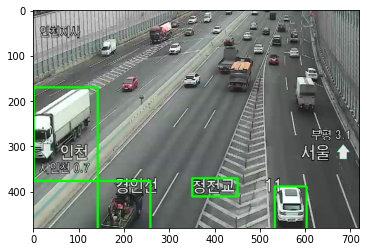

In [ ]:
img0_clone = np.copy(img0)
for i in range(len(bbox0)):
    cv2.rectangle(img0_clone, (bbox0[i][0], bbox0[i][1]), 
                              (bbox0[i][2], bbox0[i][3]),
                 color=(0, 255, 0), thickness=3)
plt.imshow(img0_clone)
plt.show()